<a href="https://colab.research.google.com/github/kavitharamesh/movie/blob/master/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/kavitharamesh/movie/master/Hydra-Movie-Scrape.csv')
#data=data.drop(['Short Summary','Cast'] , axis=1)
data.head(5)


,Title,Year,Summary,Short Summary,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,tt0300195,65,uCKwHHftrU4,6.8,https://hydramovies.com/wp-content/uploads/201...,Tony Craig,Thomas Hart,Carlos Alazraqui|Wayne Allwine
3,Mickey's House of Villains,2001,The villains from the popular animated Disney ...,The villains from the popular animated Disney ...,tt0329374,0,JA03ciYt-Ek,6.6,https://hydramovies.com/wp-content/uploads/201...,Jamie Mitchell,Thomas Hart,Tony Anselmo|Wayne Allwine
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",tt2018111,99,8CdIiD6-iF0,7.6,https://hydramovies.com/wp-content/uploads/201...,Vincent Grashaw,Brett Haley,Arman Darbo|Sawyer Barth


In [20]:
data.dataframeName = 'Hydra-Movie-Scrape.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3886 rows and 12 columns


In [10]:
data.head(5)

,Title,Year,Summary,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...",tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt
1,New York Doll,2005,A recovering alcoholic and recently converted ...,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,tt0300195,65,uCKwHHftrU4,6.8,https://hydramovies.com/wp-content/uploads/201...,Tony Craig,Thomas Hart
3,Mickey's House of Villains,2001,The villains from the popular animated Disney ...,tt0329374,0,JA03ciYt-Ek,6.6,https://hydramovies.com/wp-content/uploads/201...,Jamie Mitchell,Thomas Hart
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...",tt2018111,99,8CdIiD6-iF0,7.6,https://hydramovies.com/wp-content/uploads/201...,Vincent Grashaw,Brett Haley


In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [0]:
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='pink', edgecolor='red')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='pink', edgecolor='black')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


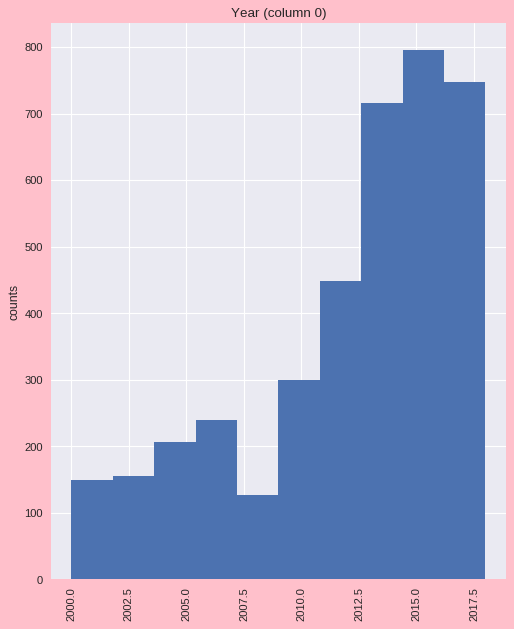

In [34]:
plotHistogram(data, 10, 5)

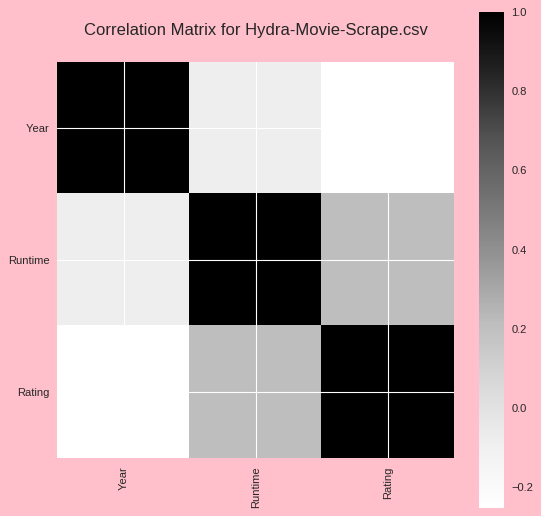

In [37]:
plotCorrelationMatrix(data, 8)

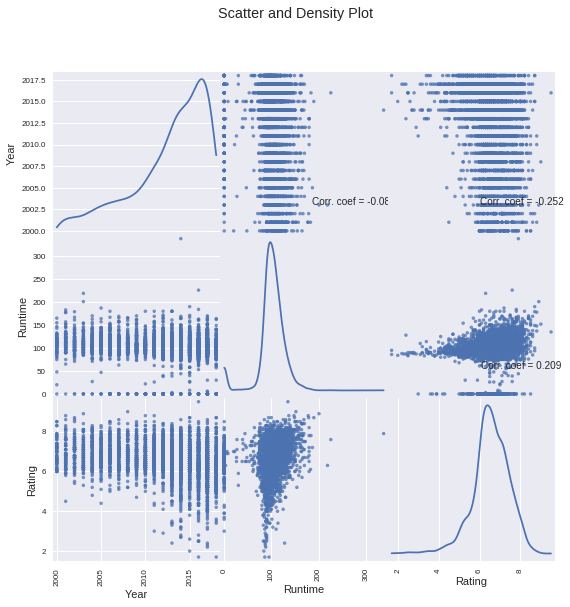

In [38]:
plotScatterMatrix(data, 9, 10)